# Analyse predictions by cTaG2
This notebook is used to analyse predictions made by cTaG2 for BRCA data.

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the prediction file
Variables to be updated for loading the prediction file.
Either the absolute path is given to *filepath* or set *PATH* and the relative path is set based on cancer type, label method, number of features and model. 

Default file name is "cTaG2_predictions.tsv". For other filenames, update *fname*.

In [51]:
PATH = "/data/malvika/cTaG2.0"
ctype = "BRCA"
lab_type = "bailey"
feat_num = "some"
model = "BalBag"
folderpath = "/output/GDC_{}/predict/multiomic".format(ctype)

filepath = PATH + folderpath + "/{}_{}_{}".format(lab_type, feat_num, model)
## Uncomment line below to set absolute path
# filepath = "\path\to\prediction\file"

In [52]:
os.chdir(filepath)
fname = "cTaG2_predictions.tsv"
data = pd.read_csv(fname, sep="\t", header=0, index_col=0)

In [53]:
data.head(5)

,Hugo_Symbol,Tumor_Sample_Barcode,Variant_Classification,CNV,logFC,Degree,Closeness_centrality,Betweeness_centrality,Label,Predicted label,Probability_Neutral,Probability_Oncogene,Probability_Tumor suppressor
TCGA-D8-A1XY-01A;FN1,FN1,TCGA-D8-A1XY-01A,Nonsense_Mutation,0.0,0.852032,61.0,0.288869,0.000273,Unlabelled,Tumor suppressor,0.348,0.228,0.424
TCGA-D8-A1XY-01A;PIK3CA,PIK3CA,TCGA-D8-A1XY-01A,Missense_Mutation,1.0,-1.162809,275.0,0.329559,0.004555,Oncogene,Oncogene,0.000,1.000,0.000
TCGA-D8-A1XY-01A;CTNNA1,CTNNA1,TCGA-D8-A1XY-01A,Silent,0.0,0.151690,101.0,0.299686,0.001630,Unlabelled,Oncogene,0.018,0.900,0.082
TCGA-D8-A1XY-01A;MAP2K4,MAP2K4,TCGA-D8-A1XY-01A,Missense_Mutation,0.0,0.069323,74.0,0.293429,0.000449,Tumor suppressor,Tumor suppressor,0.006,0.000,0.994
TCGA-D8-A1XY-01A;SEC13,SEC13,TCGA-D8-A1XY-01A,NaN,1.0,0.342091,142.0,0.293737,0.003875,Unlabelled,Tumor suppressor,0.150,0.000,0.850


In [54]:
print("Number of total samples = {}".format(len(data["Tumor_Sample_Barcode"].unique())))

Number of total samples = 963


In [55]:
print("Total number of unique genes = {}".format(len(data["Hugo_Symbol"].unique())))

Total number of unique genes = 1342


In [56]:
print("Total number of unique TSG = {}".format(list(data[["Hugo_Symbol", "Predicted label"]].drop_duplicates()["Predicted label"]).count("Tumor suppressor")))

Total number of unique TSG = 991


In [57]:
print("Total number of unique OG = {}".format(list(data[["Hugo_Symbol", "Predicted label"]].drop_duplicates()["Predicted label"]).count("Oncogene")))

Total number of unique OG = 798


In [58]:
data_unigenes = data[["Hugo_Symbol", "Predicted label"]].drop_duplicates()
multi_genes = [gene for gene in data_unigenes["Hugo_Symbol"].unique() if data_unigenes[data_unigenes["Hugo_Symbol"]==gene].shape[0]>1] 
len(multi_genes)

447

## Summary statistics for sample
Calculates the total number of genes predicted for each sample along with other counts.

Counts the number of genes with mutation, and CNV alterations.
Counts number of TSGs and OGs predicted for the sample.

In [59]:
data_samp = pd.DataFrame()
data_samp["Tumor_Sample_Barcode"] = data["Tumor_Sample_Barcode"].unique()
data_samp["Num_genes"] = [data[data["Tumor_Sample_Barcode"] == samp].shape[0] for samp in data_samp["Tumor_Sample_Barcode"]]
data_samp["Num_mut"] = [data[(data["Tumor_Sample_Barcode"] == samp) & ~(data["Variant_Classification"].isna())].shape[0] for samp in data_samp["Tumor_Sample_Barcode"]]
data_samp["Num_cnv"] = [data[(data["Tumor_Sample_Barcode"] == samp) & ~(data["CNV"] == 0)].shape[0] for samp in data_samp["Tumor_Sample_Barcode"]]
data_samp["Num_TSG"] = [data[(data["Tumor_Sample_Barcode"] == samp) & (data["Predicted label"] == "Tumor suppressor")].shape[0] for samp in data_samp["Tumor_Sample_Barcode"]]
data_samp["Num_OG"] = [data[(data["Tumor_Sample_Barcode"] == samp) & (data["Predicted label"] == "Oncogene")].shape[0] for samp in data_samp["Tumor_Sample_Barcode"]]


In [60]:
data_samp.head()

,Tumor_Sample_Barcode,Num_genes,Num_mut,Num_cnv,Num_TSG,Num_OG
0,TCGA-D8-A1XY-01A,50,4,47,31,19
1,TCGA-AO-A0J5-01A,71,3,68,44,27
2,TCGA-A8-A093-01A,10,9,1,6,4
3,TCGA-C8-A133-01A,14,6,8,9,5
4,TCGA-AQ-A54O-01A,34,1,33,15,19


### Distribution of number of genes predicted
The distribution of number of genes identified for each sample.

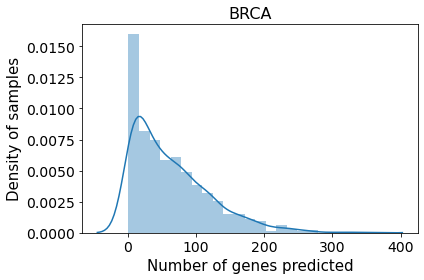

In [88]:
ax = sns.distplot(data_samp["Num_genes"])
# plt.ylim(-0.05, 1)
ax.set_xlabel("Number of genes predicted",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_geneXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Distribution of number of mutated genes predicted
The distribution of number of genes identified for each sample that were mutated.

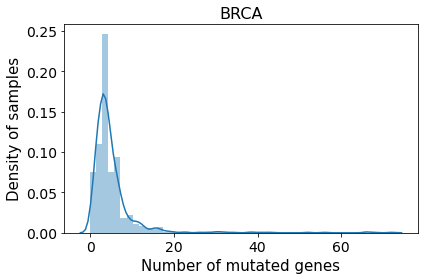

In [89]:
ax = sns.distplot(data_samp["Num_mut"])
ax.set_xlabel("Number of mutated genes",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_mutXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Distribution of number of genes predicted with CNVs
The distribution of number of genes identified for each sample that showed CNVs.

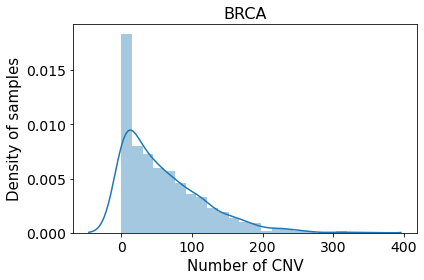

In [90]:
ax = sns.distplot(data_samp["Num_cnv"])
ax.set_xlabel("Number of CNV",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_cnvXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Distribution of number of TSGs predicted
The distribution of number of genes labelled as TSG for each sample.

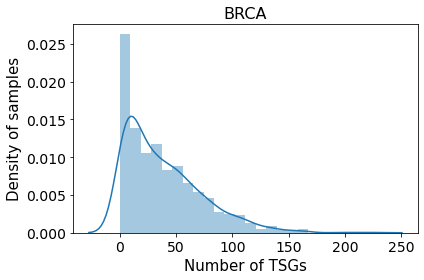

In [91]:
ax = sns.distplot(data_samp["Num_TSG"])
ax.set_xlabel("Number of TSGs",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_tsgXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Distribution of number of OGs predicted
The distribution of number of genes labelled as OG for each sample.

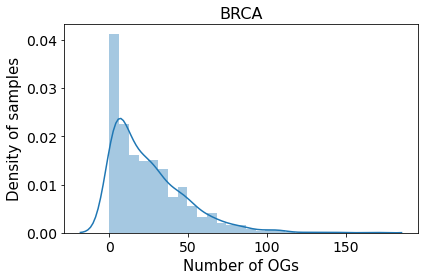

In [92]:
ax = sns.distplot(data_samp["Num_OG"])
ax.set_xlabel("Number of OGs",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_ogXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Distribution of degree of genes predicted
The distribution of degree of genes identified for each sample.

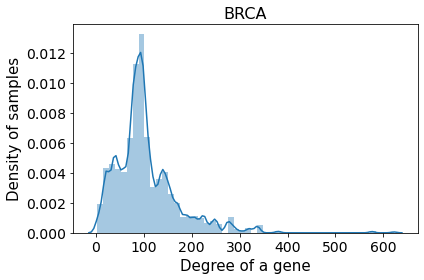

In [93]:
ax = sns.distplot(data["Degree"])
ax.set_xlabel("Degree of a gene",fontsize=15)
ax.set_ylabel("Density of samples",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()

# os.chdir(filepath)
# fname = "{}_degreeXsamp.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

## Gene based statistics


In [68]:
data_genes = pd.DataFrame(data.groupby(["Hugo_Symbol"])["Tumor_Sample_Barcode"].count())
data_genes["Degree"] = data.groupby(["Hugo_Symbol"])["Degree"].mean()

### Consensus with CGC
Load CGC data and check for consensus

In [69]:
os.chdir(PATH + "/data/driver genes/CGC")
fname = "cancer_gene_census_9nov2021.csv"
data_cgc = pd.read_csv(fname, sep=",", header=0, index_col=0)
data_genes.loc[:, "CGC"] = [True if gene in list(data_cgc.index) else False for gene in list(data_genes.index)]

In [70]:
print("Total number of genes showing consensus with CGC = {}".format(data_genes["CGC"].sum()))

Total number of genes showing consensus with CGC = 228


### Distribution of number of samples a gene is predicted as driver
The distribution of number of samples a gene is identified as driver.

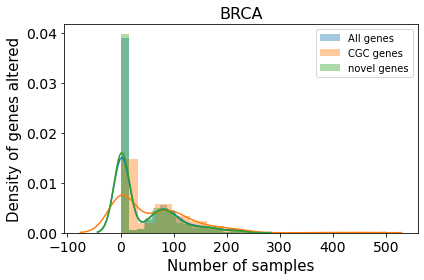

In [94]:
ax = sns.distplot(data_genes["Tumor_Sample_Barcode"], label="All genes")
sns.distplot(data_genes[data_genes.CGC ==True]["Tumor_Sample_Barcode"], label="CGC genes")
sns.distplot(data_genes[data_genes.CGC ==False]["Tumor_Sample_Barcode"], label="novel genes")
ax.set_xlabel("Number of samples",fontsize=15)
ax.set_ylabel("Density of genes altered",fontsize=15)
ax.tick_params(labelsize=14)
plt.title(ctype, fontsize=16)
plt.tight_layout()
plt.legend()

# os.chdir(filepath)
# fname = "{}_sampXgenes.png".format(ctype)
# plt.savefig(fname, dpi=300)
# plt.close()

### Top 10 genes frequently predicted
The list of genes and the number of samples they are predicted as TSG or OG.

In [72]:
data_genes.sort_values(by=["Tumor_Sample_Barcode"], ascending=False)[:10]

,Tumor_Sample_Barcode,Degree,CGC
Hugo_Symbol,,,
PIK3CA,453,275.0,True
TP53,383,337.0,True
PRKCA,239,167.0,False
MYC,235,140.0,True
GATA3,230,20.0,True
PSMC5,229,101.0,False
IKBKB,228,103.0,True
PSMD12,228,99.0,False
MAP2K6,226,93.0,False


### Top 10 genes rarely predicted as driver
The list of genes and the number of samples they are predicted as TSG or OG. Random 10 genes are listed below. More genes mutated in one sample may be

In [73]:
data_genes.sort_values(by=["Tumor_Sample_Barcode"], ascending=True)[:10]

,Tumor_Sample_Barcode,Degree,CGC
Hugo_Symbol,,,
AAAS,1,83.0,False
EPAS1,1,29.0,True
PSEN1,1,52.0,False
PSMA2,1,93.0,False
PSMD10,1,91.0,False
ELAVL1,1,16.0,False
PTGDR,1,20.0,False
PTK6,1,25.0,True
PTP4A1,1,13.0,False


In [95]:
data_genes[data_genes.Tumor_Sample_Barcode == 1].CGC.sum()

40

In [97]:
data_genes[data_genes.Tumor_Sample_Barcode == 1].shape

(332, 3)